In [57]:
#6-1
import numpy as np

samples=['The cat sat on the mat.','The dog ate my homework.']
token_index={}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word]=len(token_index)+1
max_length=10
results=np.zeros(shape=(len(samples),
                       max_length,
                       max(token_index.values())+1))
for i,sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index=token_index.get(word)
        results[i,j,index]=1.

In [58]:
#6-2
import string

samples=['The cat sat on the mat.','The dog ate my homework.']
characters=string.printable
token_index=dict(zip(characters,range(1,len(characters)+1)))

max_length=50
results=np.zeros((len(samples),max_length,max(token_index.values())+1))
for i,sample in enumerate(samples):
    for j,character in enumerate(sample):
        index=token_index.get(character)
        results[i,j,index]=1.

In [59]:
#6-3
from keras.preprocessing.text import Tokenizer

samples=['The cat sat on the mat.','The dog ate my homework.']

tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences=tokenizer.texts_to_sequences(samples)

one_hot_results=tokenizer.texts_to_matrix(samples,mode='binary')
word_index=tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.'%len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [60]:
#6-4
samples=['The cat sat on the mat.','The dog ate my homework.']

dimensionality=1000
max_length=10
results=np.zeros((len(samples),max_length,dimensionality))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index=abs(hash(word))%dimensionality
        results[i,j,index]=1.

In [61]:
#6-5
from keras.layers import Embedding

embedding_layer=Embedding(1000,64)

In [62]:
#6-6
from keras.datasets import imdb
from keras import preprocessing

max_features=10000
maxlen=20

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [63]:
#6-7
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model=Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history=model.fit(x_train,y_train,epochs=10,
                 batch_size=32,
                 validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 8)             80000     
_________________________________________________________________
flatten_9 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 113us/step - loss: 0.6744 - acc: 0.6089 - val_loss: 0.6272 - val_acc: 0.6986
Epoch 2/10
20000/20000 [==============================] - 2s 94us/step - loss: 0.5474 - acc: 0.7512 - val_loss: 0.5276 - val_acc: 0.7270
Epoch 3/10
20000/20000 [==============================] 

In [64]:
#6-8
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [65]:
#6-9
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  
training_samples = 200  
validation_samples = 10000  
max_words = 10000  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [66]:
#6-10
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [67]:
#6-11
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [68]:
#6-12

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_10 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [69]:
#6-13
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [70]:
#6-14
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.9912 - acc: 0.4700 - val_loss: 0.6928 - val_acc: 0.5191
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6363 - acc: 0.6250 - val_loss: 0.7025 - val_acc: 0.5299
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7476 - acc: 0.5350 - val_loss: 0.6926 - val_acc: 0.5274
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4982 - acc: 0.8150 - val_loss: 0.7444 - val_acc: 0.5308
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3981 - acc: 0.7850 - val_loss: 0.7083 - val_acc: 0.5576
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2848 - acc: 0.9000 - val_loss: 0.7226 - val_acc: 0.5575
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1880 - acc: 0.9650 - val_loss: 1.3925 - val_acc: 0.4947
Epoch 8/10
200/200 [========

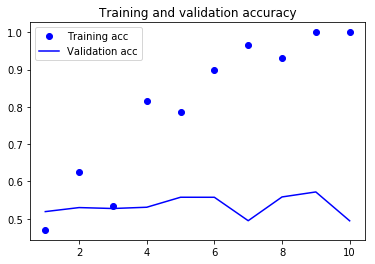

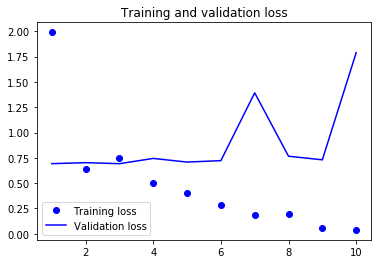

In [71]:
#6-15
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
#6-16
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(x_train,y_train,
                 epochs=10,
                 batch_size=32,
                 validation_data=(x_val,y_val))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6952 - acc: 0.4450 - val_loss: 0.6936 - val_acc: 0.5007
Epoch 2/10
200/200 [==============================] - 1s 4ms/

In [73]:
#6-17
test_dir=os.path.join(imdb_dir,'test')
labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name=os.path.join(test_dir,label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences=tokenizer.texts_to_sequences(texts)
x_test=pad_sequences(sequences,maxlen=maxlen)
y_test=np.asarray(labels)

In [75]:
#6-18
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 65us/step


[1.7714447914040088, 0.5009999871253967]

In [76]:
#6-19
state_t=0
for input_t in input_sequence:
    output_t=f(input_t,state_t)
    state_t=output_t

NameError: name 'input_sequence' is not defined

In [77]:
#6-20
state_t=0
for input_t in input_sequence:
    output_t=activation(dot(W,input_t)+dot(U,state_t)+b)
    state_t=output_t

NameError: name 'input_sequence' is not defined

In [78]:
#6-21
import numpy as np

timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps,input_features))
state_t=np.zeros((output_features,))

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

successive_outputs=[]
for input_t in inputs:
    output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    successive_outputs.append(output_t)
    state_t=output_t
    
final_output_sequence=np.stack(successive_outputs,axis=0)

In [82]:
#6-22
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('데이터 로딩...')
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')
print('시퀀스 패딩(samples x time)')

input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train 크기:',input_train.shape)
print('input_test 크기:',input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩(samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [84]:
#6-23
from keras.layers import SimpleRNN
from keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.6370 - acc: 0.6205 - val_loss: 0.4554 - val_acc: 0.8116
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3926 - acc: 0.8353 - val_loss: 0.3992 - val_acc: 0.8242
Epoch 3/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2811 - acc: 0.8878 - val_loss: 0.3512 - val_acc: 0.8574
Epoch 4/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2184 - acc: 0.9164 - val_loss: 0.3806 - val_acc: 0.8496
Epoch 5/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1523 - acc: 0.9431 - val_loss: 0.3586 - val_acc: 0.8684
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.0989 - acc: 0.9663 - val_loss: 0.4513 - val_acc: 0.8306
Epoch 7/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.0681 - acc: 0.9773 - val_loss: 0.4707 - val_acc:

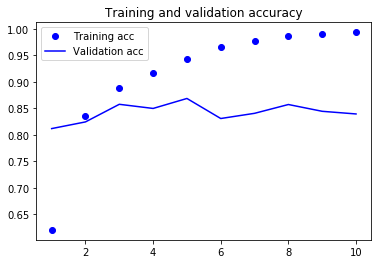

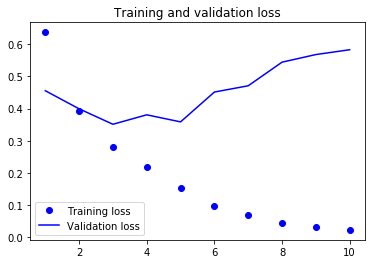

In [85]:
#6-24
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=6,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 163s 8ms/step - loss: 0.5185 - acc: 0.7459 - val_loss: 0.4168 - val_acc: 0.8202
Epoch 2/6
20000/20000 [==============================] - 164s 8ms/step - loss: 0.3120 - acc: 0.8751 - val_loss: 0.3066 - val_acc: 0.8724
Epoch 3/6
20000/20000 [==============================] - 168s 8ms/step - loss: 0.2407 - acc: 0.9076 - val_loss: 0.3170 - val_acc: 0.8636
Epoch 4/6
20000/20000 [==============================] - 177s 9ms/step - loss: 0.2050 - acc: 0.9248 - val_loss: 0.3290 - val_acc: 0.8682
Epoch 5/6
20000/20000 [==============================] - 181s 9ms/step - loss: 0.1806 - acc: 0.9352 - val_loss: 0.3860 - val_acc: 0.8652
Epoch 6/6
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1635 - acc: 0.9414 - val_loss: 0.3323 - val_acc: 0.8730


In [3]:
#6-28
import os

data_dir = './datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [4]:
#29
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

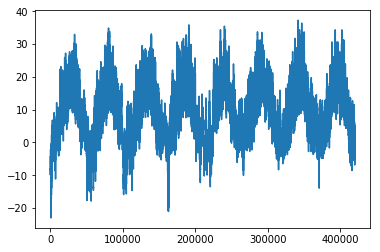

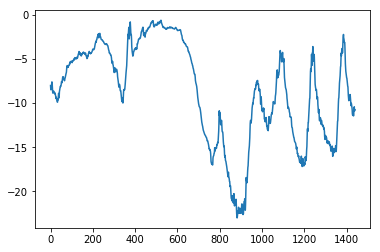

In [90]:
#30,31
temp = float_data[:, 1]  # 온도(섭씨)
plt.plot(range(len(temp)), temp)
plt.show()

plt.plot(range(1440), temp[:1440])
plt.show()

In [5]:
#32
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [6]:
#33
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [7]:
#34
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [8]:
#35
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [9]:
#36
celsius_mae=0.29*std[1]

In [96]:
#37
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
500/500 [==============================] - 33s 65ms/step - loss: 1.1906 - val_loss: 0.3850
Epoch 2/3
500/500 [==============================] - 31s 62ms/step - loss: 0.4316 - val_loss: 0.2678s: - ETA: 4s - - ETA: 0s - loss: 0
Epoch 3/3
500/500 [==============================] - 31s 62ms/step - loss: 0.2855 - val_loss: 0.2590


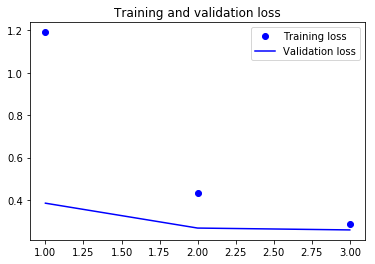

In [97]:
#38
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [98]:
#39
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
500/500 [==============================] - 423s 846ms/step - loss: 0.3064 - val_loss: 0.1607
Epoch 2/3
500/500 [==============================] - 499s 998ms/step - loss: 0.2862 - val_loss: 0.1823
Epoch 3/3
500/500 [==============================] - 545s 1s/step - loss: 0.2782 - val_loss: 0.2116


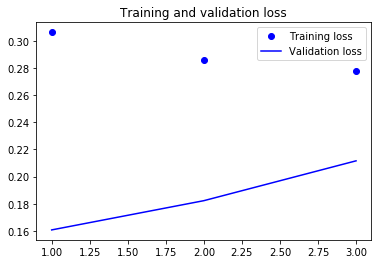

In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
#40
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
100/100 [==============================] - 148s 1s/step - loss: nan - val_loss: nan
Epoch 2/3
100/100 [==============================] - 172s 2s/step - loss: nan - val_loss: nan
Epoch 3/3
100/100 [==============================] - 133s 1s/step - loss: nan - val_loss: nan


In [13]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
#41
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
100/100 [==============================] - 312s 3s/step - loss: nan - val_loss: nan
Epoch 2/3
100/100 [==============================] - 301s 3s/step - loss: nan - val_loss: nan
Epoch 3/3
100/100 [==============================] - 298s 3s/step - loss: nan - val_loss: nan


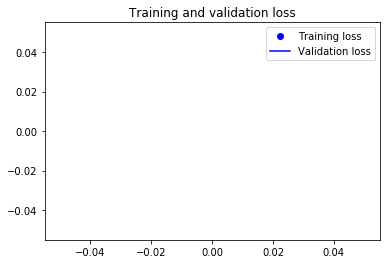

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#bonus
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [ ]:
#bonus
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

In [16]:
#42
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 500

# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스를 뒤집습니다
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스에 패딩을 추가합니다
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 150s 8ms/step - loss: 0.4977 - acc: 0.7651 - val_loss: 0.4483 - val_acc: 0.8286
Epoch 2/3
20000/20000 [==============================] - 149s 7ms/step - loss: 0.3246 - acc: 0.8770 - val_loss: 0.4546 - val_acc: 0.8152
Epoch 3/3
20000/20000 [==============================] - 157s 8ms/step - loss: 0.2577 - acc: 0.9044 - val_loss: 0.3271 - val_acc: 0.8838


In [ ]:
#bonus
from keras import backend as K
K.clear_session()

In [17]:
#43
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 220s 11ms/step - loss: 0.5748 - acc: 0.7097 - val_loss: 0.4062 - val_acc: 0.8278
Epoch 2/3
20000/20000 [==============================] - 229s 11ms/step - loss: 0.3397 - acc: 0.8681 - val_loss: 0.3280 - val_acc: 0.8772
Epoch 3/3
20000/20000 [==============================] - 256s 13ms/step - loss: 0.2689 - acc: 0.9013 - val_loss: 0.3099 - val_acc: 0.8748


In [18]:
#44
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
100/100 [==============================] - 221s 2s/step - loss: 0.3218 - val_loss: 0.2022
Epoch 2/3
100/100 [==============================] - 217s 2s/step - loss: 0.2904 - val_loss: 0.2657
Epoch 3/3
100/100 [==============================] - 229s 2s/step - loss: 0.2868 - val_loss: 0.1998


In [19]:
#45
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
max_len = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train 크기:', x_train.shape)
print('x_test 크기:', x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 크기: (25000, 500)
x_test 크기: (25000, 500)


In [20]:
#46
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

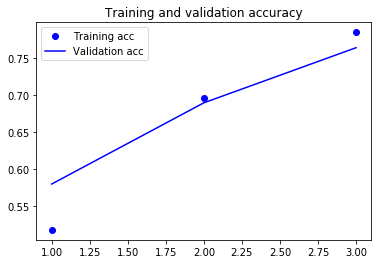

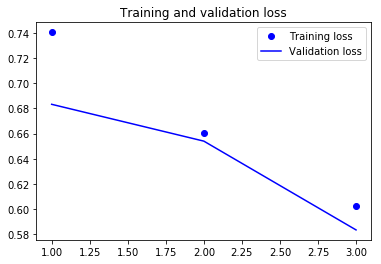

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
#47
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/3
100/100 [==============================] - 58s 581ms/step - loss: 0.4821 - val_loss: 1.0778
Epoch 2/3
100/100 [==============================] - 54s 541ms/step - loss: 0.4329 - val_loss: 1.1916
Epoch 3/3
100/100 [==============================] - 54s 539ms/step - loss: 0.4094 - val_loss: 1.3604


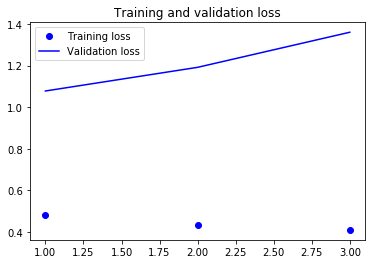

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
#48
step = 3
lookback = 1440  # 변경 안 됨
delay = 144 # 변경 안 됨

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [25]:
#49
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=3,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
100/100 [==============================] - 219s 2s/step - loss: nan - val_loss: nan
Epoch 2/3
100/100 [==

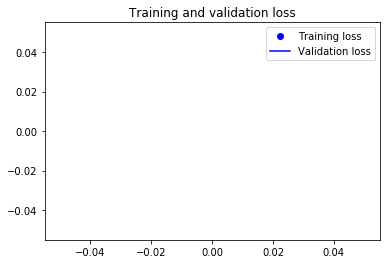

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()